In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
datos = pd.read_csv("Car_Insurance_Claim.csv")

In [6]:
datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [8]:
datos.describe().T


,count,mean,std,min,25%,50%,75%,max
ID,10000.0,500521.906800,290030.768758,101.000000,249638.500000,501777.000000,753974.500000,999976.000000
CREDIT_SCORE,9018.0,0.515813,0.137688,0.053358,0.417191,0.525033,0.618312,0.960819
VEHICLE_OWNERSHIP,10000.0,0.697000,0.459578,0.000000,0.000000,1.000000,1.000000,1.000000
MARRIED,10000.0,0.498200,0.500022,0.000000,0.000000,0.000000,1.000000,1.000000
CHILDREN,10000.0,0.688800,0.463008,0.000000,0.000000,1.000000,1.000000,1.000000
POSTAL_CODE,10000.0,19864.548400,18915.613855,10238.000000,10238.000000,10238.000000,32765.000000,92101.000000
ANNUAL_MILEAGE,9043.0,11697.003207,2818.434528,2000.000000,10000.000000,12000.000000,14000.000000,22000.000000
SPEEDING_VIOLATIONS,10000.0,1.482900,2.241966,0.000000,0.000000,0.000000,2.000000,22.000000
DUIS,10000.0,0.239200,0.554990,0.000000,0.000000,0.000000,0.000000,6.000000
PAST_ACCIDENTS,10000.0,1.056300,1.652454,0.000000,0.000000,0.000000,2.000000,15.000000


In [9]:
datos.head(5)

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [24]:
datos['PAST_ACCIDENTS'].value_counts()

0     5584
1     1783
2     1104
3      646
4      366
5      232
6      144
7       61
8       41
9       19
10       9
11       7
12       2
14       1
15       1
Name: PAST_ACCIDENTS, dtype: int64

| Columna             | Tipo  |        Valores  | Distribución esperada |
| ------------------- | ----- |---------------- |---------------- |
| AGE                 | ordinal | 16-25, 26-39, 40-64, 65+  | La misma proporción (posible menos en 16, 65)|
| GENDER              | nominal | male, female | la misma proporción |
| RACE                | nominal | majority, minority | más de la mayoritatia |
| DRIVING_EXPERIENCE  | ordinal | 0-9y,10-19y, 20-29y, 30y+        | misma proporción (menos según más experiencia) |
| EDUCATION           | ordinal | none, high school, university | según sociedad |
| INCOME              | ordinal | poverty, working class, middle class, upper class | según sociedad |
| CREDIT_SCORE        | cuantitativa  | [0,1], media: 0.5 | normal |
| VEHICLE_OWNERSHIP   | nominal | 0: NO 1: SI | npi |
| VEHICLE_YEAR        | nominal | before 2015, after 2015 |  npi |
| MARRIED             | nominal | 0: NO 1: SI |  npi |
| CHILDREN            | nominal | 0: NO 1: SI |  npi (menos de los que no) |
| POSTAL_CODE         | 10000 |10238, 32765, 92101, 21217       |  npi |
| ANNUAL_MILEAGE      | cuantitativa  |2000, 22000| normal |
| VEHICLE_TYPE        | nominal | sedan, sports car | Imagino que más sedan |
| SPEEDING_VIOLATIONS | cuantitativa | (0,22)  | sucesos raros - poisson |
| DUIS                | cuantitativa | (0,6)  | sucesos raros - poisson |
| PAST_ACCIDENTS      | cuantitativa | (0,15)  | sucesos raros - poisson |
| OUTCOME             | nominal  |0: NO 1: SI| esperamos que más 0 |

** Tenemos una muestra. Solo hay datos de 4 Codigos postales. De 2 de ellos tengo pocos datos... De hecho de uno de ellos, no hay datos casi.

array([[<AxesSubplot: title={'center': 'ID'}>,
        <AxesSubplot: title={'center': 'CREDIT_SCORE'}>,
        <AxesSubplot: title={'center': 'VEHICLE_OWNERSHIP'}>],
       [<AxesSubplot: title={'center': 'MARRIED'}>,
        <AxesSubplot: title={'center': 'CHILDREN'}>,
        <AxesSubplot: title={'center': 'POSTAL_CODE'}>],
       [<AxesSubplot: title={'center': 'ANNUAL_MILEAGE'}>,
        <AxesSubplot: title={'center': 'SPEEDING_VIOLATIONS'}>,
        <AxesSubplot: title={'center': 'DUIS'}>],
       [<AxesSubplot: title={'center': 'PAST_ACCIDENTS'}>,
        <AxesSubplot: title={'center': 'OUTCOME'}>, <AxesSubplot: >]],
      dtype=object)

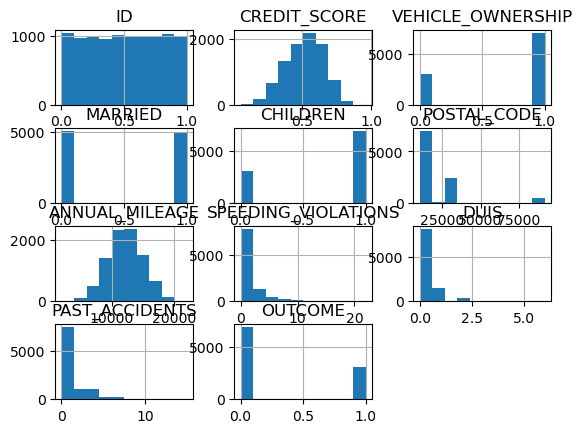

In [25]:
datos.hist()

Propietario: 30% No son propietarios

Married: 50%-50%

Children: 30% NO

Outcome:  25% SI


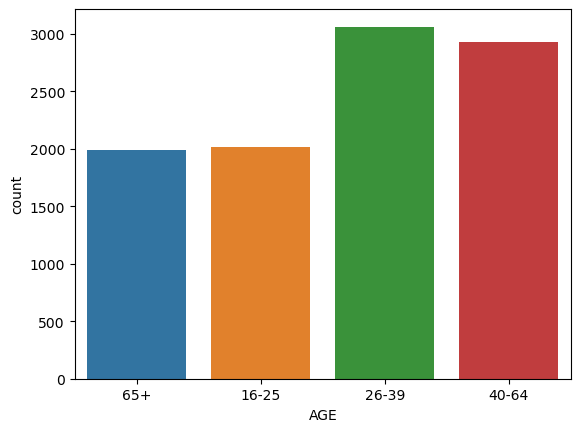

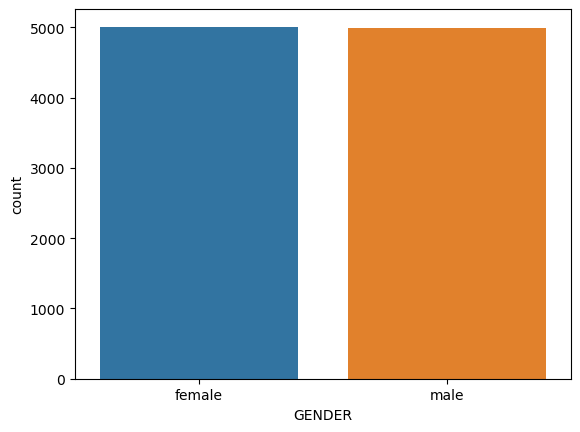

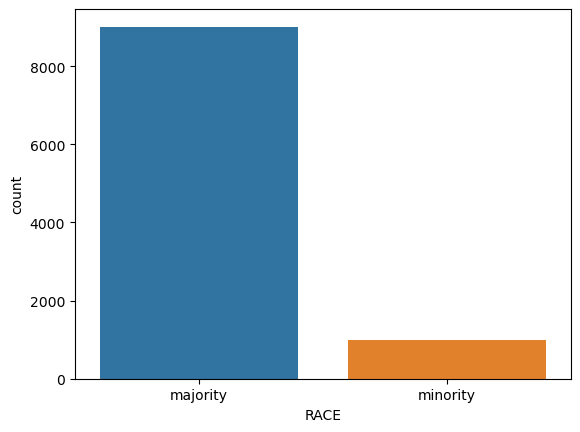

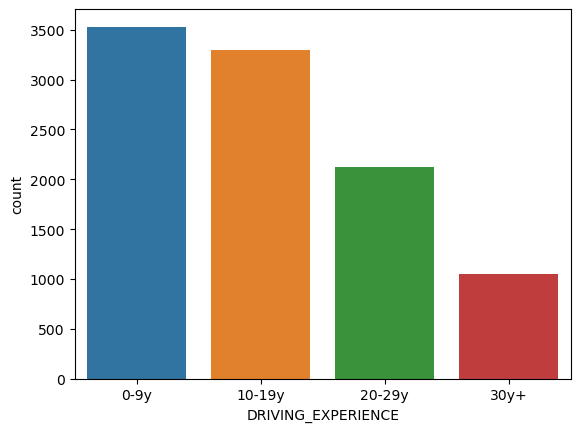

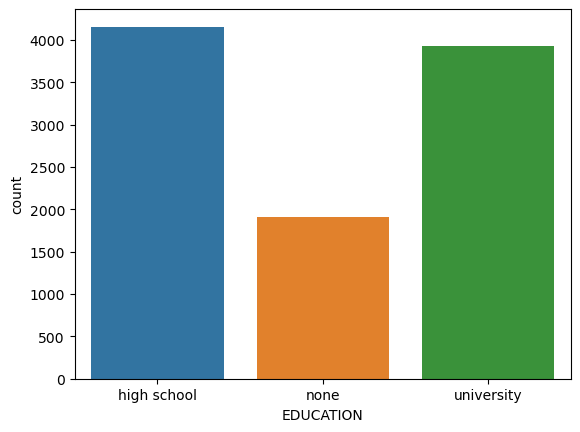

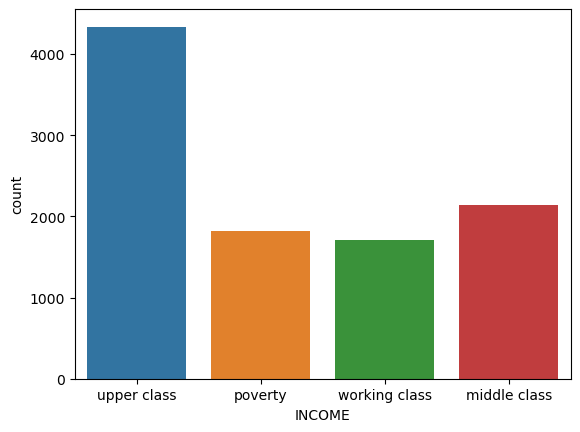

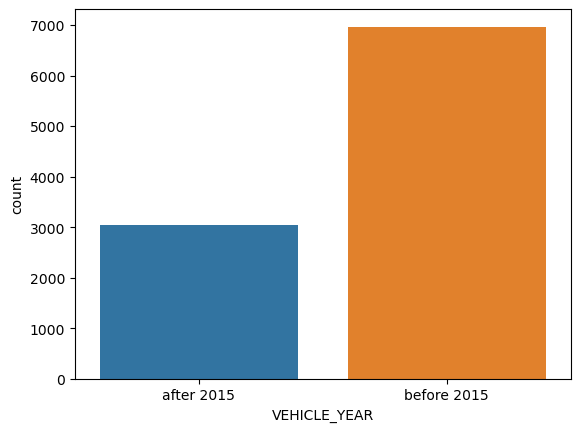

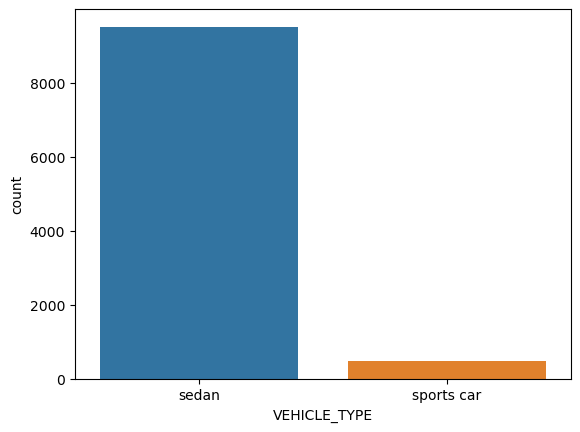

In [26]:
sns.countplot(data=datos, x='AGE')
plt.show()
sns.countplot(data=datos, x='GENDER')
plt.show()
sns.countplot(data=datos, x='RACE')
plt.show()
sns.countplot(data=datos, x='DRIVING_EXPERIENCE')
plt.show()
sns.countplot(data=datos, x='EDUCATION')
plt.show()
sns.countplot(data=datos, x='INCOME')
plt.show()
sns.countplot(data=datos, x='VEHICLE_YEAR')
plt.show()
sns.countplot(data=datos, x='VEHICLE_TYPE')
plt.show()

In [ ]:
# Objetivo

1- Entender los datos, y como se relacionan entre si
2- Dar una probabilidad a dar un parte en el primer año en base a estos datos.

Me temo, que en este caso, a diferencia del caso de los seguros de vida, las relaciones no son tan directas.
Cual sería el objetivo real....

In [28]:
datos['OUTCOME'].value_counts()

0.0    6867
1.0    3133
Name: OUTCOME, dtype: int64